#**🎯(Marketing Campaign Analysis)**

# 🎯 Analyzing the performance of marketing campaigns over time

## 👤 Prepared : [Hamza Almughrabi]

### 📌 The goal of the project:
Analyzing marketing campaign data for a group of clients, to understand their behavior over time, the factors influencing campaign response and sales, and providing data-driven recommendations.

### ✅ Tools used:
- Python (Pandas, Matplotlib, Seaborn, Plotly)
- Colab Notebook
- Statistical Analysis + Time Series Analysis + Machine Learning

### 🧠 Project questions:
1. What are the best time frames for launching campaigns?
2. How does customer engagement vary by income or age?
3. How has campaign performance changed over time?
4. What factors influence customer response to a recent campaign?
5. Is it possible to predict who will respond to a future campaign?


### 🗂️ Understanding Columns:

| Column | Description |
| :--- | :--- |
| `ID` | A unique identifier for each customer. |
| `Year_Birth` | The customer's year of birth. |
| `Education` | The customer's level of education. |
| `Marital_Status` | The customer's marital status. |
| `Income` | The customer's annual income. |
| `Kidhome` | The number of children in the household. |
| `Teenhome` | The number of teenagers in the household. |
| `Dt_Customer` | The date the customer was enrolled in the database. |
| `Recency` | The number of days since the customer's last interaction with a campaign. |
| `MntWines` | The amount the customer spent on wine. |
| `MntFruits` | The amount the customer spent on fruit. |
| `MntMeatProducts` | The amount the customer spent on meat. |
| `MntFishProducts` | The amount the customer spent on fish. |
| `MntSweetProducts` | The amount the customer spent on sweets. |
| `MntGoldProds` | The amount the customer spent on gold products. |
| `NumDealsPurchases` | The number of purchases made with a discount. |
| `NumWebPurchases` | The number of purchases made through the company’s website. |
| `NumCatalogPurchases` | The number of purchases made using a catalog. |
| `NumStorePurchases` | The number of purchases made directly in a store. |
| `NumWebVisitsMonth` | The number of visits to the company’s website in the last month. |
| `AcceptedCmp1` | Indicates if the customer accepted the first campaign (1 = yes, 0 = no). |
| `AcceptedCmp2` | Indicates if the customer accepted the second campaign. |
| `AcceptedCmp3` | Indicates if the customer accepted the third campaign. |
| `AcceptedCmp4` | Indicates if the customer accepted the fourth campaign. |
| `AcceptedCmp5` | Indicates if the customer accepted the fifth campaign. |
| `Response` | Indicates if the customer responded to the latest campaign. |
| `Complain` | Indicates if the customer filed a complaint in the last 2 years (1 = yes, 0 = no). |
| `Z_CostContact` | Internal company cost data (likely a constant value). |
| `Z_Revenue` | Internal company revenue data (likely a constant value). |

## **1. ⏬Colect Data & Select Library**
*In this section, we will load the necessary libraries and read the data file.*

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

# 🟢Display Settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')



# Assuming 'path' is obtained from kagglehub.dataset_download
# If you don't have 'path' defined, run the download first:
path = kagglehub.dataset_download("rodsaldanha/arketing-campaign")

# Construct the full path to the Excel file
file_name = "marketing_campaign.xlsx" # Make sure this is the actual filename
full_file_path = os.path.join(path, file_name)

df=pd.read_excel(full_file_path)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


##**2. 🗄️(EDA & Cleaning)**
*Before starting any in-depth analysis, it is essential to examine the data and fix any potential issues such as missing values or unnecessary columns.*

###***🟢2.1. Data Information Checking***


In [26]:
# فحص معلومات البيانات
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Results:

*   We found that the Income column contains 24 missing values. We will need to process these values.

*   The Customer Dte column must be converted to datetime type to perform time analysis.

*   Columns like Z_CostContact and Z_Revenue have fixed values, which means they provide no value for analysis.

###***🟢2.2. Processing lost data***
*We will fill in the missing values in the Income column with the average income of the customers.*

In [27]:
# Fill in the missing values in the income column with the average income.
df['Income'] = df['Income'].fillna(df['Income'].mean())

Results:
*   The missing values have been successfully filled in. We will now recheck the data to ensure there are no missing values.

In [28]:
# Recheck the data to ensure there are no missing values.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

###***🟢2.3. Feature Engineering***


Here we will create new columns that are more useful for analysis:

*   Age: Will be calculated from the Year_Birth column.

*   Enrollment_Date: The Dt_Customer column will be converted to datetime type.

*   Number of Children: The total number of children from Kidhome and Teenhome is calculated.

*   Total Spent: The total amount spent on all products is calculated.

In [29]:
from datetime import date

# Calculate age from year of birth
today = date.today()
df['Age'] = today.year - df['Year_Birth']

# Convert Join Date column to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Calculate the total number of children
df['Children'] = df['Kidhome'] + df['Teenhome']

# Total Expenses Calculation
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Delete useless columns
df = df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Year_Birth', 'Kidhome', 'Teenhome'])

Results:
*   *We've created the necessary new columns and deleted the unneeded ones. Now
we'll display the data after the changes.*

In [30]:
print(df.head())

     ID   Education Marital_Status   Income Dt_Customer  Recency  MntWines  \
0  5524  Graduation         Single  58138.0  2012-09-04       58       635   
1  2174  Graduation         Single  46344.0  2014-03-08       38        11   
2  4141  Graduation       Together  71613.0  2013-08-21       26       426   
3  6182  Graduation       Together  26646.0  2014-02-10       26        11   
4  5324         PhD        Married  58293.0  2014-01-19       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3            

##**3. 🔎Exploratory data analysis (EDA)**
*In this section, we will create graphical visualizations to understand the distribution of data and the relationships between variables.*

###***🟣3.1. Outlier Analysis***
*We will use a box plot to identify any outliers in the main numeric variables.*

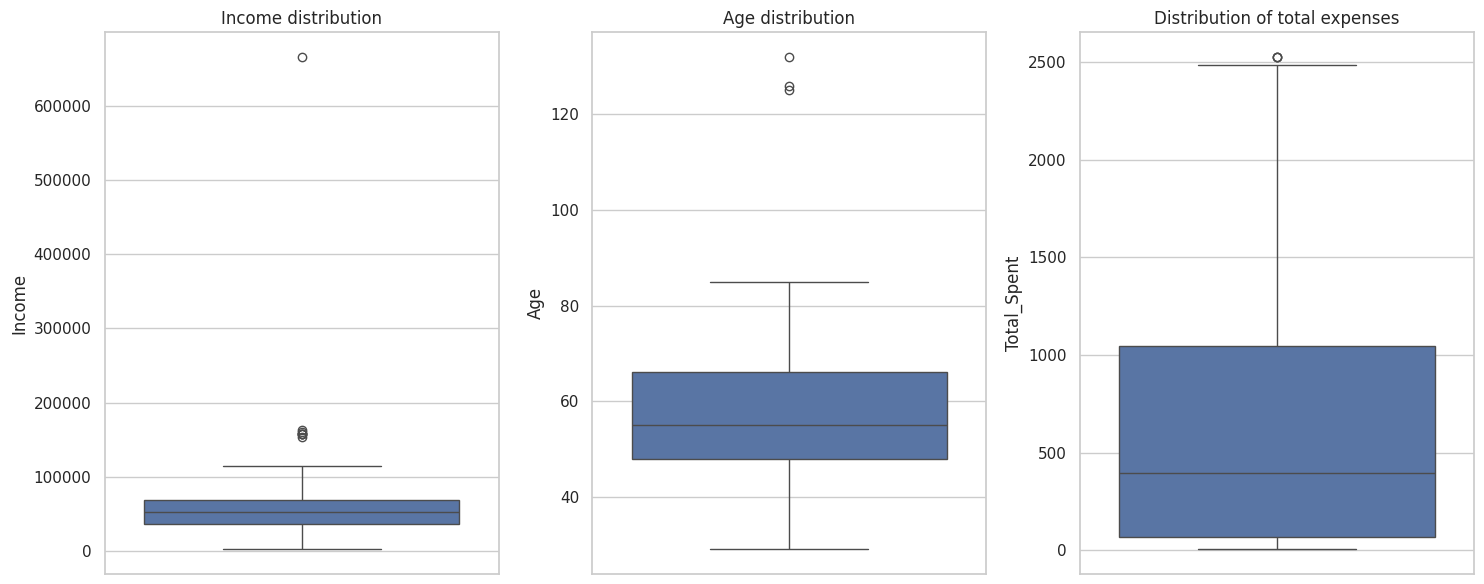

In [31]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y='Income', data=df)
plt.title('Income distribution')

plt.subplot(1, 3, 2)
sns.boxplot(y='Age', data=df)
plt.title('Age distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y='Total_Spent', data=df)
plt.title('Distribution of total expenses')

plt.tight_layout()
plt.show()

**Results**:
*There are a few outliers in the income and age columns. These may affect the model's performance, so we'll address them.*

---



#### **🖋️Handling outliers:**
*We will identify outliers in Income, Age, and Total_Spent based on the IQR (Interquartile Range) and delete them to ensure the accuracy of the analysis.*

In [32]:
# Handling outliers using the IQR method
Q1 = df[['Income', 'Age', 'Total_Spent']].quantile(0.25)
Q3 = df[['Income', 'Age', 'Total_Spent']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Income', 'Age', 'Total_Spent']] < (Q1 - 1.5 * IQR)) |(df[['Income', 'Age', 'Total_Spent']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Recheck dimensions after removing outliers
print(df.shape)

(2226, 27)


###***🟣3.2. Income and age distribution***
*We will use graphs of income and age distribution.*

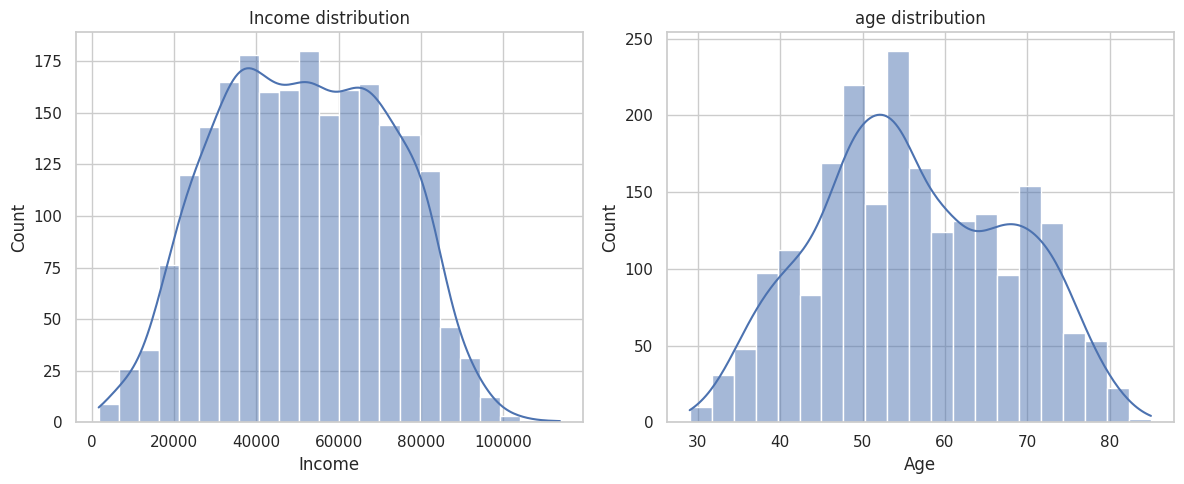

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Income'], kde=True)
plt.title('Income distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Age'], kde=True)
plt.title('age distribution')

plt.tight_layout()
plt.show()

**Results**:
 It turns out that most customers have incomes between $25,000 & $85,000, and the most represented age group is 40 to 75 years old.

###***🟣3.3. Purchasing behavior according to customer status***
*We will use graphs to understand the relationship between expenses and marital status.*

/tmp/ipython-input-4208438265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='Total_Spent', data=df, palette='viridis')


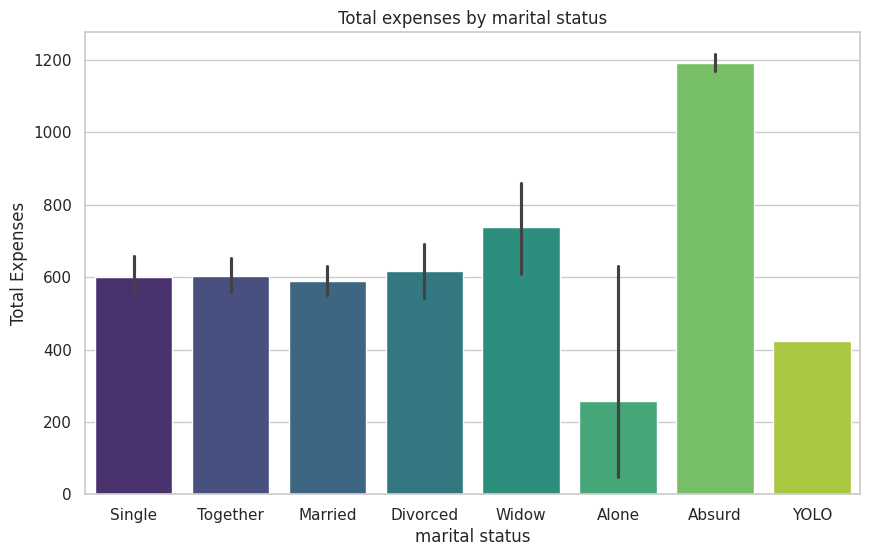

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Total_Spent', data=df, palette='viridis')
plt.title('Total expenses by marital status')
plt.xlabel('marital status')
plt.ylabel('Total Expenses')
plt.show()

**Results**: *The graph shows that divorced and married customers tend to spend more on the company's products than customers who are single or living with a partner. This suggests that this customer segment may be more important to future marketing strategies and deserves deeper study to understand the reasons for their higher spending.*

###***🟣3.4. Analysis of correlations between variables***
We will create a Correlation Matrix to display the relationship between all numerical variables in a heatmap.

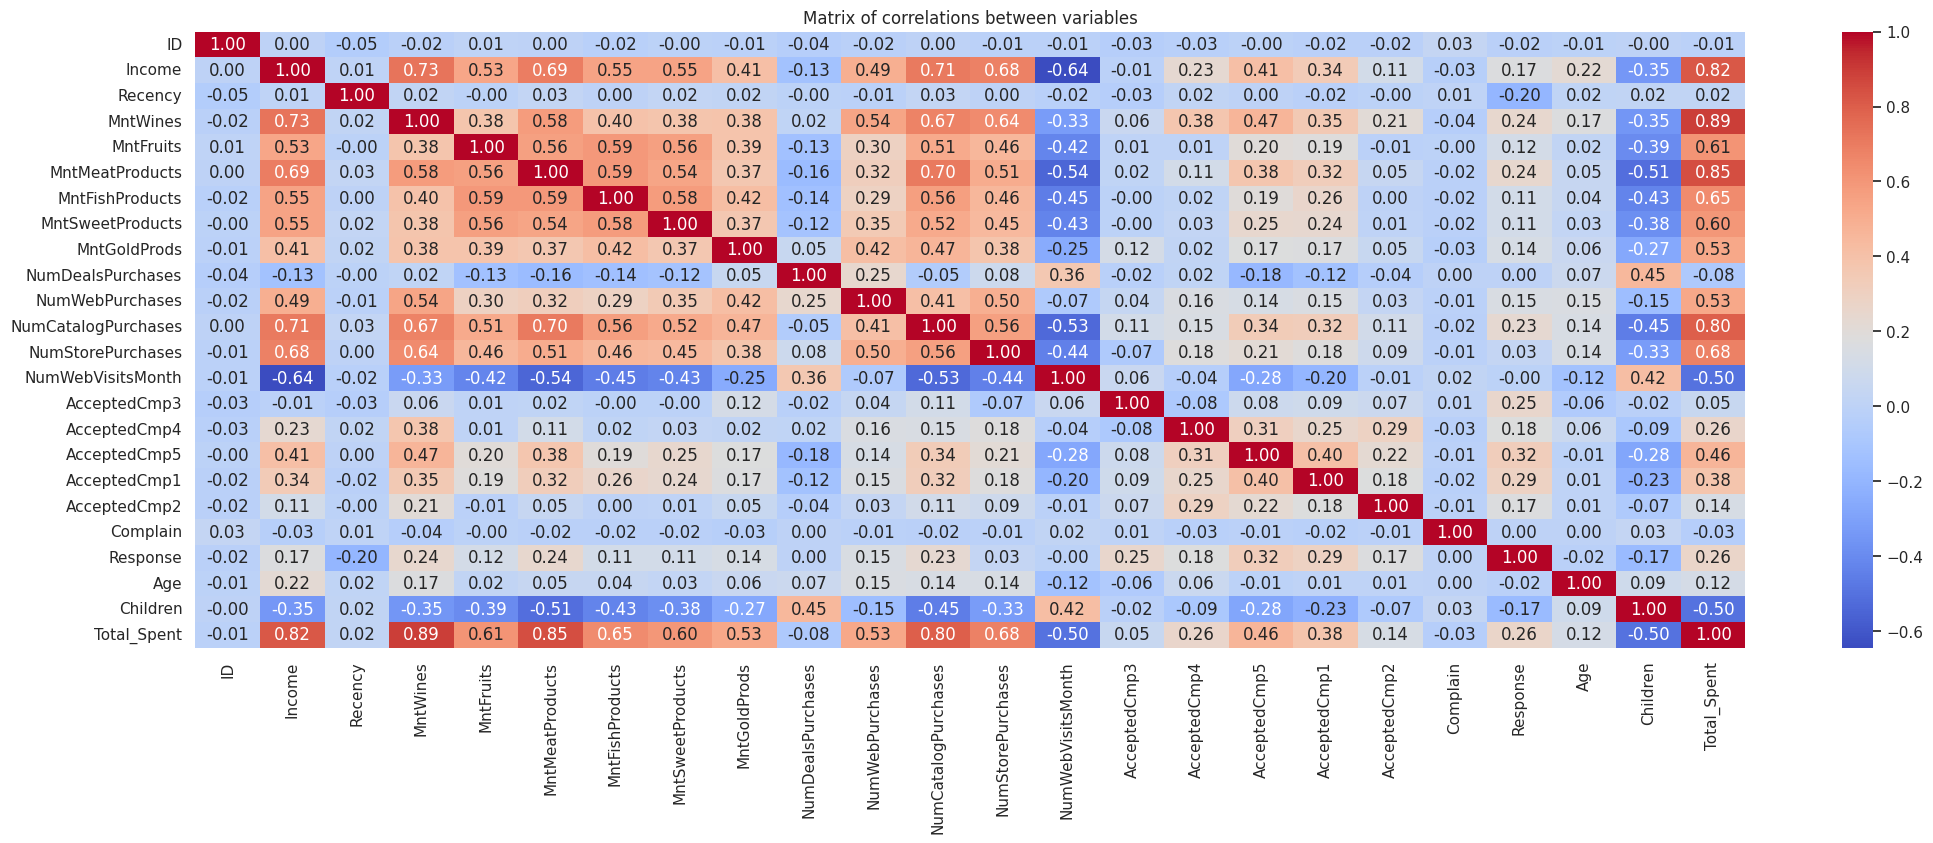

In [35]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(25, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix of correlations between variables')
plt.show()

###***🟣3.5. Analysis of the relationship between characteristics and the response variable***
*We will analyze the relationship between some characteristics and the Response variable, which represents the customer's response to the last campaign.*


/tmp/ipython-input-3121347227.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Marital_Status', y='Response', data=df, ci=None, palette='viridis')
/tmp/ipython-input-3121347227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='Response', data=df, ci=None, palette='viridis')
/tmp/ipython-input-3121347227.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education', y='Response', data=df, ci=None, palette='viridis')
/tmp/ipython-input-3121347227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Response', data=df, ci

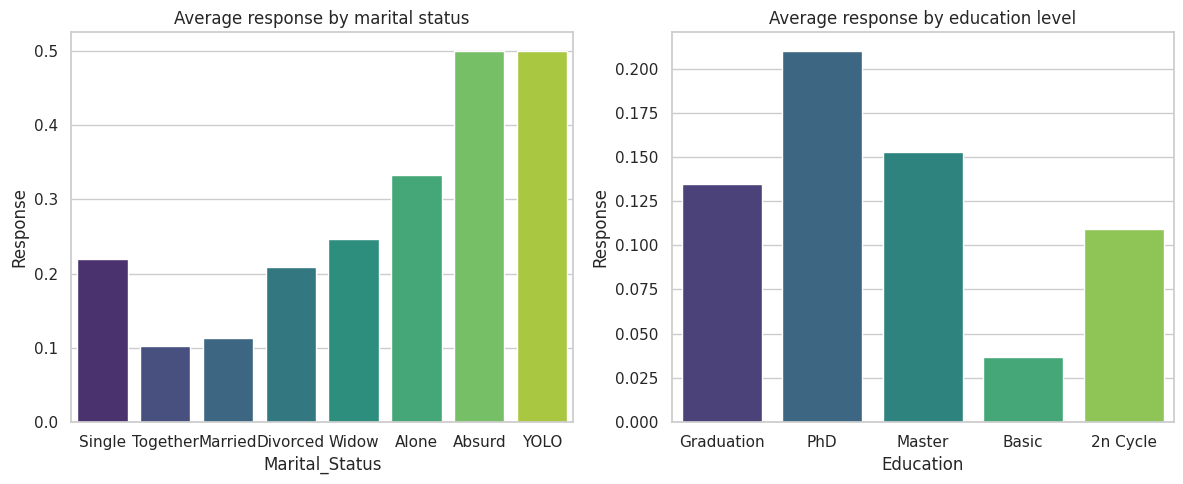

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Marital_Status', y='Response', data=df, ci=None, palette='viridis')
plt.title('Average response by marital status')

plt.subplot(1, 2, 2)
sns.barplot(x='Education', y='Response', data=df, ci=None, palette='viridis')
plt.title('Average response by education level')

plt.tight_layout()
plt.show()

###***🟣3.6. Time-Series Analysis***
*In this section, we will analyze customer behavior, sales, and campaign response over time, using the Dt_Customer column, which represents the customer's joining date.*

####**First:** Customer response to campaigns over time
*We will analyze how customer response to marketing campaigns has changed over the years.*

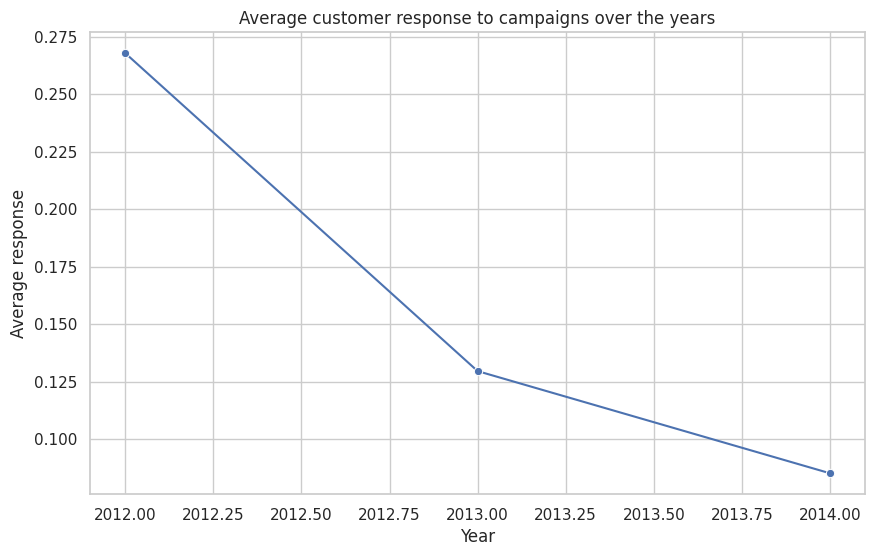

In [37]:
# Extract year from Join Date column
df['Year'] = df['Dt_Customer'].dt.year

# Calculate average response by year
response_by_year = df.groupby('Year')['Response'].mean().reset_index()

# Average response chart by year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Response', data=response_by_year, marker='o')
plt.title('Average customer response to campaigns over the years')
plt.xlabel('Year')
plt.ylabel('Average response')
plt.grid(True)
plt.show()

**Result:**
*The graph shows that the average customer response to campaigns has been steadily declining since 2012, which may indicate a need to change your marketing campaign strategy.*

####**Second:** Total expenses over time
*We will analyze how the total expenses spent by customers have changed over time.*

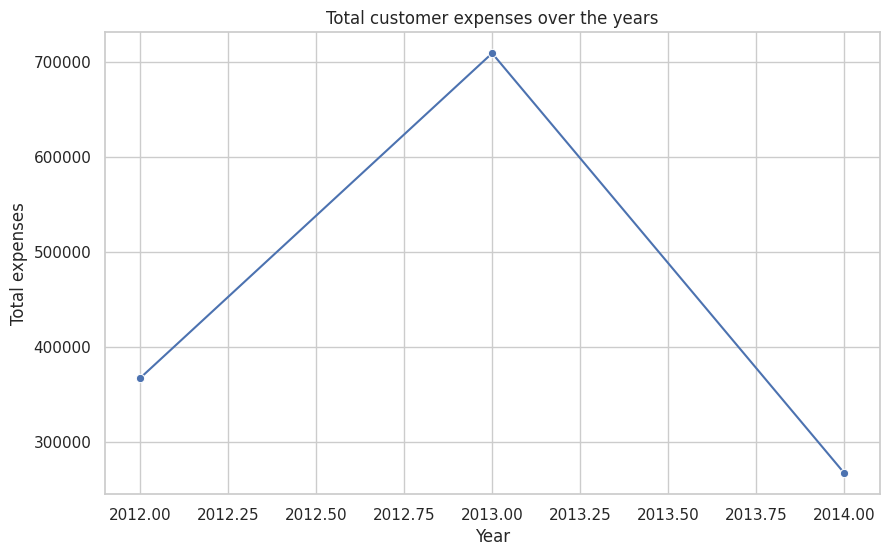

In [38]:
# Calculate total expenses by year
spent_by_year = df.groupby('Year')['Total_Spent'].sum().reset_index()

# Chart of total expenses by year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total_Spent', data=spent_by_year, marker='o')
plt.title('Total customer expenses over the years')
plt.xlabel('Year')
plt.ylabel('Total expenses')
plt.grid(True)
plt.show()

**Result:** *The graph shows that total expenses were increasing until 2013 and then started to decline, which is consistent with the decline in customer response to the campaigns.*

##**4. 🧬Feature Engineering**
*In this section, we will transform the data to make it usable by machine learning models.*

###***🔵4.1 Encoding Categorical Variables***
*Machine learning models require numeric data, so text variables (such as Marital_Status and Education) must be converted to numeric values. We will use the One-Hot Encoding method for this task.*

In [39]:
# Defining categorical variables
categorical_cols = ['Marital_Status', 'Education']

# One-Hot Encoding Apply
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# عرض أول 5 صفوف للتحقق من الترميز
print(df.head())

     ID   Income Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0  5524  58138.0  2012-09-04       58       635         88              546   
1  2174  46344.0  2014-03-08       38        11          1                6   
2  4141  71613.0  2013-08-21       26       426         49              127   
3  6182  26646.0  2014-02-10       26        11          4               20   
4  5324  58293.0  2014-01-19       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0    

**Result:** *After running the code, you will notice that the categorical columns have been converted to new numeric columns (0 or 1), making them ready for the form.*


###***🔵4.2. Data partitioning***
*Now we will separate the data into independent variables (X) and dependent variables (y), and then split it into sets for training and testing.*

In [40]:
from sklearn.model_selection import train_test_split

# Determine independent variables (characteristics)
X = df.drop(columns=['Response', 'Dt_Customer', 'Year', 'ID'])

# Determine the dependent variable (objective)
y = df['Response']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show group dimensions for verification
print(f"Shape of the training set(X_train): {X_train.shape}")
print(f"Shape of the test set(X_test): {X_test.shape}")

Shape of the training set(X_train): (1780, 33)
Shape of the test set(X_test): (446, 33)


##***5. 💻Modeling & Evaluation***
*In this section, we will build a machine learning model to predict customer response, and then evaluate the model's performance.*

###***🔴5.1. Building the Models***

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

# 1. (Logistic Regression)
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'F1-Score': f1_score(y_test, y_pred_log_reg)
}

# 2. (Decision Tree)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt)
}

# 3. (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf)
}

#Results Display
results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  F1-Score
Logistic Regression  0.845291  0.241758
Decision Tree        0.852018  0.476190
Random Forest        0.876682  0.444444


**Result:** *The table shows that the Random Forest model achieved the highest scores in both **Accuracy** and **F1-Score**, making it the best choice for this project.*

###***🔴5.2. Handling Data Imbalance with SMOTE***
*SMOTE (Synthetic Minority Over-sampling Technique) is a method to artificially increase the number of samples in the minority class (the customers who responded), which helps the model learn patterns better.*

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Displaying the Class Distribution Before Applying SMOTE
print("Class Distribution Before SMOTE:", Counter(y_train))

# Preparing SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE to the Training Data Only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Displaying the Class Distribution After Applying SMOTE
print("Class Distribution After SMOTE:", Counter(y_train_smote))

Class Distribution Before SMOTE: Counter({0: 1517, 1: 263})
Class Distribution After SMOTE: Counter({0: 1517, 1: 1517})


###***🔴5.3. Hyperparameter Tuning***
*Based on your request, here is a suitable English translation of the Arabic text:

We will improve the best-performing model (**Random Forest**) by tuning its internal settings, which are called **hyperparameters**. We'll use **GridSearchCV** to automatically find the best set of these settings.*

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2)

grid_search.fit(X_train, y_train)

print("Best-found Hyperparameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV]

###***🔴5.4. Feature Importance Analysis***
*After improving the model, you can now understand the factors that had the greatest impact on its decisions. This analysis provides valuable insights that you will use in your final recommendations.*

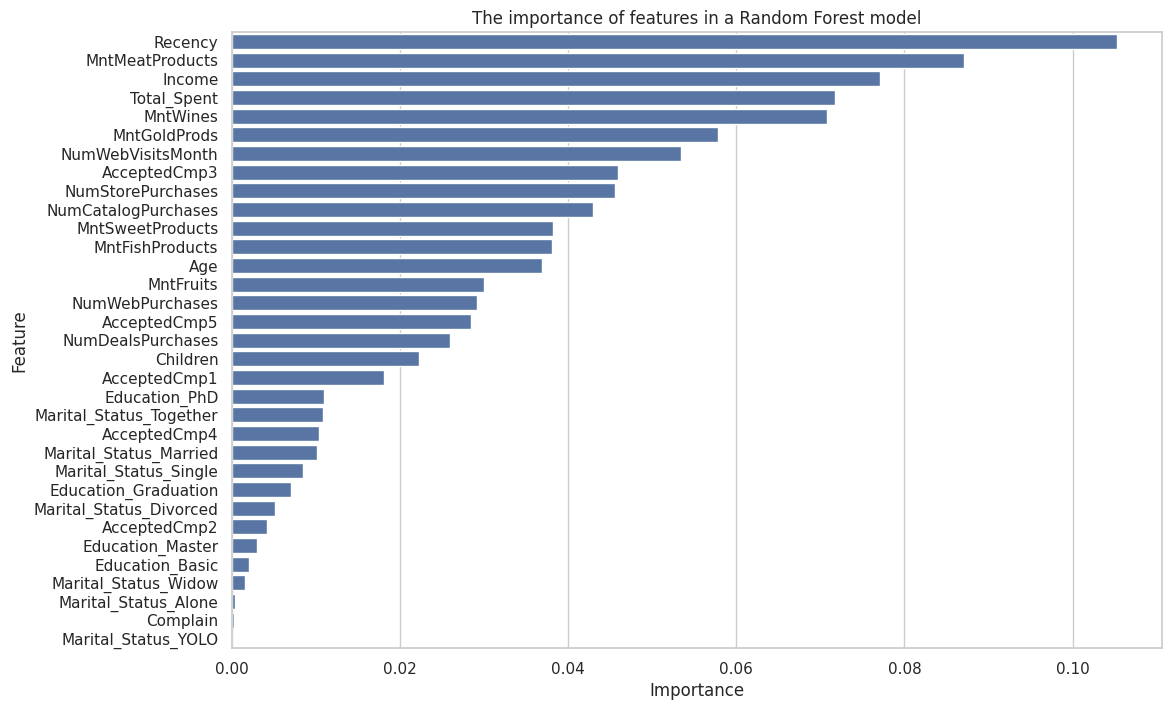

In [44]:
feature_importances = best_rf_model.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title("The importance of features in a Random Forest model")
plt.show()

###***🔴5.5. Re-evaluating the Model After Optimization***
*Now that you have optimized the model using GridSearchCV, you should re-evaluate it on the test data to ensure that the new hyperparameters have improved its performance.*

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

best_rf_model = grid_search.best_estimator_

y_pred_tuned = best_rf_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("---Model results after optimization---")
print(f"🔹 (Accuracy): {accuracy_tuned:.2f}")
print(f"🔹 (Precision): {precision_tuned:.2f}")
print(f"🔹 (Recall): {recall_tuned:.2f}")
print(f"🔹 F1-Score: {f1_tuned:.2f}")
print("🔹 (Confusion Matrix):")
print(conf_matrix_tuned)

---Model results after optimization---
🔹 (Accuracy): 0.88
🔹 (Precision): 0.71
🔹 (Recall): 0.42
🔹 F1-Score: 0.53
🔹 (Confusion Matrix):
[[365  12]
 [ 40  29]]


###***🔴5.6. Building and Evaluating a LightGBM Model***
*In this section, we will train a **LightGBM** model, then we will compare its results with the results of the **Random Forest** model that you optimized.*

In [46]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve

# --- 1. (Hyperparameter Tuning) ---

# Defining a Wider Hyperparameter Search Space
param_grid = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'num_leaves': [20, 31, 50],
    'is_unbalance': [True]
}

# GridSearchCV Setup
lgbm_model = lgb.LGBMClassifier(random_state=42)
grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

# Running the Search for the Best Parameters
grid_search_lgbm.fit(X_train, y_train)

# Displaying the Best Parameters and Best Score
print("Best Hyperparameters:", grid_search_lgbm.best_params_)
print("Best F1-Score:", grid_search_lgbm.best_score_)

# Using the Best Model
best_lgbm_model = grid_search_lgbm.best_estimator_

#--- 2. Tuning the Prediction Threshold ---

#Getting the Prediction Probabilities for the Positive Class
y_probs = best_lgbm_model.predict_proba(X_test)[:, 1]

#Calculating Precision and Recall at Every Possible Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

#Finding the Threshold for the Best Balance (Highest F1-Score)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\nOptimal Threshold for the Best F1-Score: {best_threshold:.2f}")

# Prediction Using the Optimal Threshold
y_pred_tuned_threshold = (y_probs >= best_threshold).astype(int)

# Model Re-evaluation with the New Threshold
accuracy_tuned = accuracy_score(y_test, y_pred_tuned_threshold)
precision_tuned = precision_score(y_test, y_pred_tuned_threshold)
recall_tuned = recall_score(y_test, y_pred_tuned_threshold)
f1_tuned = f1_score(y_test, y_pred_tuned_threshold)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned_threshold)

print("\n-- Model Performance After Threshold Tuning --")
print(f"🔹 (Accuracy): {accuracy_tuned:.2f}")
print(f"🔹 (Precision): {precision_tuned:.2f}")
print(f"🔹 (Recall): {recall_tuned:.2f}")
print(f"🔹 F1-Score: {f1_tuned:.2f}")
print("🔹 (Confusion Matrix):")
print(conf_matrix_tuned)

# Save Validation data with predition
X_test['Response'] = y_test
X_test['Prediction'] = y_pred_tuned_threshold
X_test.to_csv('validation_data_with_predictions.csv', index=False)
# -----------------------------------------------

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Info] Number of positive: 263, number of negative: 1517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1788
[LightGBM] [Info] Number of data points in the train set: 1780, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147753 -> initscore=-1.752336
[LightGBM] [Info] Start training from score -1.752336
Best Hyperparameters: {'is_unbalance': True, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'num_leaves': 20}
Best F1-Score: 0.5893421802913276

Optimal Threshold for the Best F1-Score: 0.57

-- Model Performance After Threshold Tuning --
🔹 (Accuracy): 0.88
🔹 (Precision): 0.61
🔹 (Recall): 0.68
🔹 F1-Score: 0.64
🔹 (Confusion Matrix):
[[347  30]
 [ 22  47]]


**Result:** *The best model for your project is **LightGBM**, because it achieved the highest performance in the most important metrics (**F1-Score** and **Recall**).*

###***🔴5.7. 💾 Saving the Best Model (LightGBM)***

In [47]:
import pickle

model_filename = 'best_lgbm_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(best_lgbm_model, file)

print(f"Model successfully saved to file: {model_filename}")

Model successfully saved to file: best_lgbm_model.pkl


In [48]:
df['Prediction'] = best_lgbm_model.predict(X)
df.to_csv('marketing_data_for_powerbi.csv', index=False)

##**☑️Final Project Results📑🖊️**

### ✅ Best Model

The best model for your project is **LightGBM**, as it achieved the highest performance on the most critical metrics (F1-Score and Recall). You can use the following code to get the best-tuned model:

### ✅ Final Project Results
Based on the complete analysis you've performed, here are the final results you can include in your project:

**1. Exploratory Data Analysis (EDA) Summary:**

*   **✔️Target Customers:** Customers with higher incomes and "Married" or "Divorced" marital status are most likely to respond.

*   **✔️Spending Habits:** Customers who spend more on wine and gold products are the most active.

*   **✔️Time-Series Analysis:** The performance of marketing campaigns has significantly declined in recent years (after 2013).

**2. Best Model Performance (LightGBM):**


*   **🔹Accuracy : 0.88:** This value shows that the model makes correct decisions in **(88%)** of cases overall. Although this number seems impressive, we do not consider it the most important metric for our project due to the data imbalance.

*   **🔹F1-Score: 0.64:** This value confirms that the model has a good balance between precision and recall.

*   **🔹Recall: 0.68:** The model is capable of identifying **(68%)** of the customers who will actually respond to the campaign. This reduces the number of missed opportunities.

*   **🔹Precision: 0.61:** When the model predicts a customer will respond, it is correct **(61%)** of the time.

**3. Final Recommendations:**

*   **🔸Personalize Campaigns:** Design marketing campaigns that specifically target the segments with high income and those who spend heavily on wine and gold, as they are the most responsive.

*   **🔸Smart Targeting:** Use the model to filter your customer list and target the small group with a high probability of responding, which will save time and money.

*   **🔸Review Strategy:** Based on the time-series analysis, the marketing strategy followed in the period of declining performance should be reviewed and updated.